In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from IPython.display import Image
import numpy as np
from scipy import stats
import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

<h1>$ Statistics: The\, Science\, of\, Decisions$</h1> 

<h3>Background Information</h3>
<p><i>In a Stroop task, participants are presented with a list of words with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED is red, BLUE is blue.</i></p>

<p><i>In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE is blue, BROWN is green.</i></p>

<p><i>In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.</i></p><br>

<h3><strong>Q1:</strong><em> What is our independent variable? What is our dependent variable?</em></h3><br>

<p><strong>A1:</strong><em> An independent variable, also known an experimental or predictor variable, is a variable that is being manipulated in an experiment in order to observe the effect on a dependent variable, sometimes called an outcome variable.</em></p>

<p><em>In this study, our independent variable is, <strong>Congruent and Incongruent words condition.</strong> Our dependent variable is,<strong> Reaction time of the participants.</strong> Specifically, the amount of time taken by participants to speak out words in both congruent and incongruent conditions.</em></p><br>

<h3><strong>Q2:</strong><em> What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.</em></h3><br>

<p><b>A2:</b><i> Appropriate hypotheses for this task are:<br>
For the Null hypothesis we are guessing that stroop test does not affect reaction time.</i></p>

$$H_o: \mu_{congruent} = \mu_{incongruent}$$ 

<i> For the Alternate hypothesis we are guessing that stroop test decreases reaction time.</i>

$$H_a: \mu_{congruent} < \mu_{incongruent}$$ 

<p><i>Here $\mu_{congruent}$ means (an hypothetical) average reaction time for the congruent words condition. And $\mu_{incongruent}$ means (an hypothetical) average reaction time for incogruent words condition. We are hypothesising that average reaction time to read a set of words before and after the stroop test will be same. One the other hand, we are also proposing an alternate hypothesis which argues that stroop test will make us slower and delay our reaction time. Hence, $\mu_{congruent} < \mu_{incongruent}$ </i></p>

<p><i>The statistical test we are going to perform on our hypostheses is: a one tailed t-test in the negative direction, at an $\alpha$ level of 0.05 and a confidence interval of 95%. Through this test, we are trying to validate whether stroop test decreases reaction time or not. Therefore, if our t-value is within the (negative) t-critical region of our chosen alpha level, we will reject the null.</i></p><br> 
<p><i>Given that we dont know the standard deviation of the population, our sample size being less than 30 and our alternate hypothesis suggesting that $\mu_{congruent}$ will be less than $\mu_{incongruent}$ (in other words, alternate hypothesis going in the negative direction), a one tailed t-test in the negative direction will be an appropriate test to validate our hyposthesis. Also, note that because the same subjects took the tests in two different conditions, we have dependent samples. We can compare the two averages of these dependent samples with a one-tailed t-test.</i></p><br>

<h3><b>Q3:</b> <i>Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.</i></h3><br>

<p><b>A3:</b> <i>To answer this question, lets first look at the dataset.</i></p>



In [3]:
# loading csv
df= pd.read_csv("data/stroopdata.csv")
congruent = df["Congruent"]
incongruent = df["Incongruent"]
print(df)

    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


<i>As we can see, the table above is divided into two columns:</i> 
<ul><i>
<li><b>Congruent:</b> Displays time (in seconds) each participant took to read words pre stroop test.</li> 
<li><b>Incongruent:</b> Displays time (in seconds) each participant took to read words post stroop test.</li>
</i></ul>

<i>This table below tells us about the sample size and degrees of freedom of the dataset.</i> 



In [4]:
from prettytable import PrettyTable as pt
x = pt()
x.field_names = ["Sample Size", "Degress of Freedom"]
x.add_row([len(df), len(df) - 1])
print(x)

+-------------+--------------------+
| Sample Size | Degress of Freedom |
+-------------+--------------------+
|      24     |         23         |
+-------------+--------------------+


<i>Calculated on the basis of the dataset, the measures of central tendency and variability of the two conditions are shown in the following table:</i>

In [5]:
# descriptive statistics
print(df.describe())

       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000


<i>There is a big difference between the mean and median values of congruent and incongruent words conditions. Where on one hand, the average time taken by a participant to read words pre stroop test is 14.05 seconds. On the other, the same participant has taken an average time of 22.02 seconds post stroop test. That is an average difference of -7.97 seconds! This is an indication that participants read faster in congruent words condition than in incongruent words condition. But is this indication statistically significant to effect the entire population, is too early to tell.<br></i>

<i> The dataset can be further examined through these box plots below which compare the measures of spread of both the conditions.</i> 


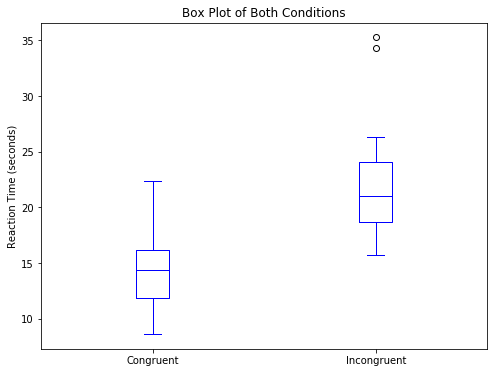

In [6]:
# Box plots of the two conditions
#plt.figure()
df.plot(title="Box Plot of Both Conditions", kind="box", color="b",
       figsize=(8,6))
y_label = plt.ylabel('Reaction Time (seconds)')

<p><i>The lowest time taken to read a set of words is 8.63 seconds and the highest time taken is 22.328 seconds as shown by the lower and upper whiskers of the box plot of congruent words condition. 
The 1st quartile of congruent words lies at 11.712 seconds; 3rd quartile of congruent words lies at 16.398 seconds. The interquatile range of congruent words is 4.69 seconds.</i></p>

<p><i>On the other hand, 15.687 seconds is the lowest value and 35.255 seconds is higest value of the incongruent words condition. The 1st quartile of incongruent words lies at 18.693 seconds while the 3rd quartile lies at 24.209 seconds. The interquartile range is 5.52 seconds.</i><br>
<i>The box plots definitely imply that there is a difference between those two conditions.</i></p><br>

<h3><b>Q4:</b> <i>Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.</i></h3><br>


<b>A4:</b> <i>The charts below compare the histograms of both congruent and incogruent words condition.</i>

[0, 40, 0, 8]

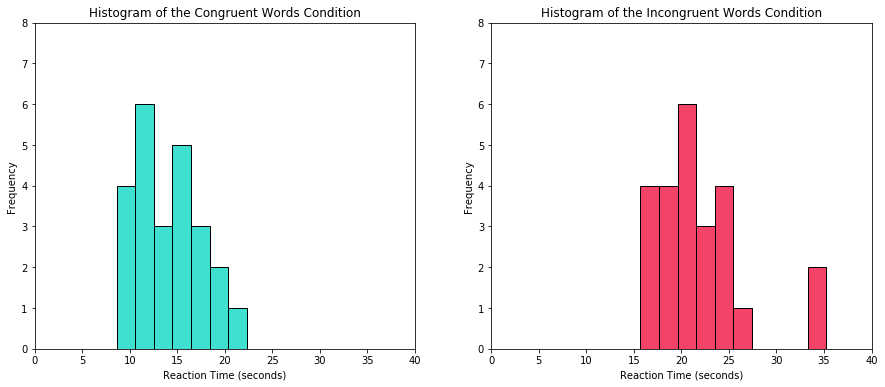

In [7]:
# Histogram of the Congruent words Condition
plt.subplot(1, 2, 1)
plot1 = congruent.plot(title="Histogram of the Congruent Words Condition", kind="hist", bins=7, color="Turquoise",
                      figsize = (15, 6), edgecolor='black', linewidth=1)
xLabel = plt.xlabel('Reaction Time (seconds)')
plt.axis([0,40,0,8])

# Histogram of the Incongruent words Condition
plt.subplot(1, 2, 2)
plot2 = incongruent.plot(title='Histogram of the Incongruent Words Condition', kind="hist", color="#f44268",
                        figsize= (15, 6), edgecolor='black', linewidth=1)
xLabel = plt.xlabel('Reaction Time (seconds)')
plt.axis([0,40,0,8])

<i> The tallest bin of the congruent words condition histogram has a frequency of 6 with an interval of 10 - 12.5 seconds. This suggests that most particapants took between 10 to 12.5 seconds to read words before the stroop test. In comparison, the histogram of incongruent words condition suggests that the time taken by most participants to read a set of words after stroop test, was between 20 - 22.5 seconds. This comparison futher establishes a delay in reaction time between the two conditions.</i> 

<i>This difference in reaction time is highlighted considerably by clustered bar chart below which compares the reaction time of each individual sample in the dataset before and after the stroop test.</i>

In [8]:
# cluster chart for congruent and incongruent words

trace1 = go.Bar(
    x= [i for i in range(1, 25)],
    y= congruent,
    name='Congruent'
)
trace2 = go.Bar(
    x= [i for i in range(1, 25)],
    y= incongruent,
    name='Incongruent'
)
trace3 = go.Bar(
    x = [i for i in range(1, 25)],
    y = congruent - incongruent,
    name = "Difference"
)

data = [trace1, trace2, trace3]
layout = go.Layout(title='Cluster chart for Congruent and Incongruent Words', 
                   barmode='group', 
                   xaxis = dict(title = "Participants"),
                   yaxis = dict(title = "Response time in Seconds")
                  )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

<p><i>The blue bars are the reaction time for congruent words condition and orange ones are for the incongruent words condition; the green bars are the difference between them. Lower bars indicate faster reaction time while higher bars indicate slower reaction time. Looking at the chart, we can observe a side by side comparison of how the reaction time differs before and after the test. And this comparison quite convincingly shows us that every single participant in the sample took more time in reading words after the stroop test was introduced.</i></p><br> 

<h3><b>Q5:</b> <i>Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?</i></h3><br>

<p><b>A5:</b> <i> Here are a some values we need to know before we start our statistical test:</i></p>
$$degrees\, of\, freedom: \, 23$$
$$t-critical\, value\, for\, \alpha\; 0.05:\, -1.714$$
$$Mean\, difference:\, -7.96\, seconds$$
$$Standard\, Error:\, 0.99\, seconds$$

<i>We can now calculate the t score based on the above values,</i>

$$t\,score:\, -8.02$$

<i>The t score has a p value $<$ 0.0001. And therefore it can be said, the result is significant at p $<$ 0.05%</i>

<i>Lower and upper bounds for a 95% confidence interval are:</i>
$$Lower\, bound -10.01\, seconds $$ 
$$Upper\, bound -5.91\, seconds$$

<i> Finally we can say, because the t score of our test is way below our t-critical value of -1.714, we reject the null.</i><br> 
<i>Based on this evidence, we can conclude that stroop test decreases reaction time. This result definately matches our expectations.</i>

<h3>References</h3>

<ul>List of references:
<li>Introduction to statistics, http://www.Udacity.com</li>
<li>wikipedia</li>
<li>http://www.statisticshowto.com</li>
<li>http://www.stattrek.com</li>
<li>http://www.minitab.com</li>
<li>http://blog.minitab.com/</li>
<li>http://www.khanacademy.org</li>
<li>http://www.plotly.ly</li>
<li>http://www.udemy.com</li>
<li>cartoon guide to statistics by Larry Gonick and Woollcott Smith</li></ul>